# Building a Simple Linear Regression Model from Scratch
## The goal of this Notebook is to walk you through the Gradient Descent Optimization Algorithm in Machine Learning.


## We choose Auto-mpg(miles per gallon) Dataset from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
path = 'C:\\Users\\Harikrishna\\.cache\\kagglehub\\datasets\\uciml\\autompg-dataset\\versions\\3\\auto-mpg.csv'
data = pd.read_csv(path)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(398, 9)

In [5]:
data.head

<bound method NDFrame.head of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1          

In [6]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [7]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [8]:
data.info

<bound method DataFrame.info of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1        

In [9]:
data.drop('car name', axis=1, inplace = True)

In [10]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [11]:
data.replace('?', np.nan, inplace = True)

In [12]:
data = data.dropna()

In [13]:
data.shape

(392, 8)

In [14]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### weight parameter has the highest correlation with mpg, so we consider weight parameter as input feature

In [15]:
X = data["weight"].values
y = data["mpg"].values

Text(0.5, 1.0, 'Fig. 1: Car Weights vs. MPG')

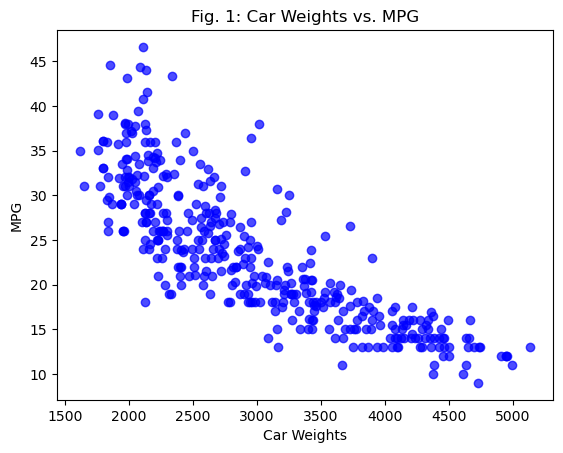

In [16]:
plt.scatter(X, y, color='blue', alpha=0.7)
plt.xlabel('Car Weights')
plt.ylabel('MPG')
plt.title('Fig. 1: Car Weights vs. MPG')

## Normalizing input feature car weight

In [17]:
X = (X - np.mean(X)) / np.std(X)

In [18]:
X.shape

(392,)

In [19]:
# reshape to m*n or 2D array
X = X.reshape(-1, 1)

In [20]:
X.shape

(392, 1)

Text(0.5, 1.0, 'Fig. 2: Car Weights vs. MPG')

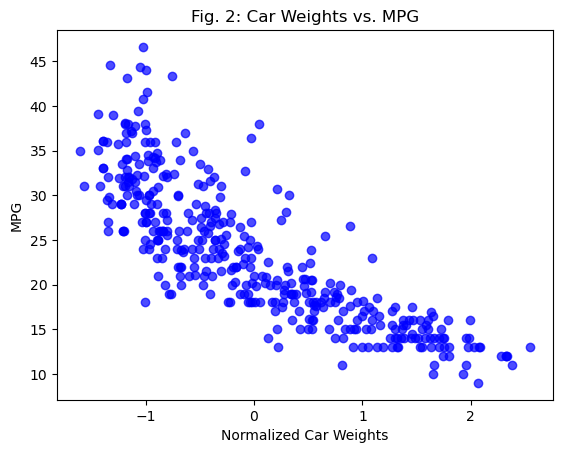

In [21]:
plt.scatter(X, y, color='blue', alpha=0.7)
plt.xlabel('Normalized Car Weights')
plt.ylabel('MPG')
plt.title('Fig. 2: Car Weights vs. MPG')

## Splitting Data

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
X_train.shape

(313, 1)

## Training the model

### Since we are training the model with one input feature(weights of car) and one output feature(mpg), we choose simple linear regression model

**Do you agree that our model is linear and we can represent it mathematically with a straingh line f(x) = wX + b ?**

**where X will be the input array with car weights and w, b are the _parameters_ (slope and y-intercept in math terms, weight and bias in ML terms respectively) that we should find, to plot the model that fits to our data**


## Cost/Loss Function:


The cost function we choose to calculate the error in prediction is Mean Squared Error (MSE):

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f(x_i) - y_i \right)^2----------> eq (1)
$$

Where:
- \( f(x) = wx + b \) (the predicted value),
- \( y_i \) is the actual value,
- \( m \) is the number of data points.


## Calculating the gradients
_**The goal is to find the w and b as optimal as possible(If not optimal, MSE will be high, which is not good for model) so that we can best plot/fit the line (model) and predict the output value(mpg) for an input value (car weight) as close as possible.**_

To put this in technical terms:

**Objective: Minimize the Cost Function**

* The goal of linear regression is to minimize the **Mean Squared Error (MSE)** cost function, J(w,b)
* \( J(w, b) \) measures the average squared difference between the predicted values 
\( f(x_i) = w x_i + b \) and the actual values \( y_i \).

### Gradient Descent for Linear Regression

To apply **gradient descent** with the cost function \( J(w, b) \), we should update the parameters \( w \) and \( b \).

**Time to think:**
Let's take a moment here and think: why do we need to update and how we can update those parameters?

Let me remind you that our goal is to find the optimal \( w \) and \( b \), but we don't know how to find those yet. If you are extremely lucky, you could guess the right \( w \) and \( b \), and calculate the  using MSEe However you need verify, if that is the minimum error that you can getrand those are the best parameters you could find. ror. But in reality, we dhave much freedom to guess the initial values for parametersuxury. Instead, we need a systematic way to improve our guess by iterating through different values of \( w \) and \( b \), reducing the error each tright?ime. 

This is where **gradient descent** comes in. The idea is simple: Start with some initial values for \( w \) and \( b \), calculate the error, and then adjust those parameters in a direction that reduces the error. But how do we know which direction to take?

This is exactly why we need **gradients**: they tell us how much the error would change if we tweak \( w \) or \( b \). The gradient points in the direction of the steepest increase in error, so we go in the opposite direction to minimize it. 

Now, let's dive into how we calculate these gradients and how they guide our updates!


> _If you wonder how we got those, you should have knowledge of basic calculus to perform partial derivatives on our cost function with respect to \( w \) and \( b \)._

### 1. Update for \( w \):
$$
w := w - \alpha \cdot \frac{\partial J(w, b)}{\partial w} \tag{eq(2)}
$$

**Gradient for \( w \):**
$$
\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \left( f(x_i) - y_i \right) x_i \tag{eq(3)}
$$

- This gradient represents the average of the errors scaled by the input feature \( x_i \), and indicates how to adjust \( w \) to minimize the cost function.

### 2. Update for \( b \):
$$
b := b - \alpha \cdot \frac{\partial J(w, b)}{\partial b} \tag{eq(4)}
$$

**Gradient for \( b \):**
$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( f(x_i) - y_i \right) \tag{eq(5)}
$$

- This gradient represents the average of the errors and shows how to adjust \( b \) to minimize the cost function.
  
Where:
- \($\alpha$) is the **learning rate**,
- \( f(x_i) = w x_i + b \) is the **predicted value**.


## Computing the gradient

In [24]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradients( eq(3) and eq(5) ) for simple linear regression.

    Args:
      X : (ndarray Shape (m,)) data, m examples (single feature).
      y : (ndarray Shape (m,)) target values.
      w : (scalar)              value of parameter w (weight).
      b : (scalar)              value of parameter b (bias).

    Returns:
      dj_dw : (scalar)          The gradient of the cost w.r.t. w.  ------->  eq (3)
      dj_db : (scalar)          The gradient of the cost w.r.t. b.  ------->  eq (5)
"""     
    _X = [i[0] for i in X]
    m = len(_X)  # number of examples
    dj_dw = 0.0
    dj_db = 0.0

    # Compute gradients
    for i in range(m):
        f_wb = w * _X[i] + b
        error = f_wb - y[i]
        dj_dw += error * _X[i]
        dj_db += error

    # Average over all examples
    dj_dw /= m # -------> eq (3)
    dj_db /= m # -------> eq (5)
    #print("gradients ",dj_dw, dj_db)
    return dj_dw, dj_db

## Gradient Descent

In [25]:
def gradient_descent(X, y, w, b, alpha, num_iters):
    """
    Performs gradient descent(batch) to learn w and b.

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  initial weights of the model      
      b : (scalar)              initial bias of the model
      alpha : (float)           learning rate
      num_iters : (int)         number of iterations for gradient descent

    Returns:
      w : (ndarray Shape (n,))  updated weights
      b : (scalar)              updated bias
      J_history : (list)        cost value at each iteration
    """
    m = len(y)
    J_history = []
    weights_and_bias = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * dj_dw # -------> eq (2)
        b -= alpha * dj_db # -------> eq (4)

        #weights_and_bias.append((w[0],b))
        weights_and_bias.append((w,b))

        # Compute Mean Squared Error cost function 
        cost = (1 / (2 * m)) * np.sum((np.dot(X, w) + b - y) ** 2)

        J_history.append(cost)

    return w, b, J_history, weights_and_bias

In [59]:
w = 0
b = 0
alpha = 0.1
num_iters = 40

In [60]:
w, b, costs, weights_and_bias = gradient_descent(X_train, y_train, w, b, alpha, num_iters)

In [61]:
print("Slope/Weight from SL:",w)
print("Bias from SL:",b)

Slope/Weight from SL: -6.580065131658576
Bias from SL: 23.3120603883499


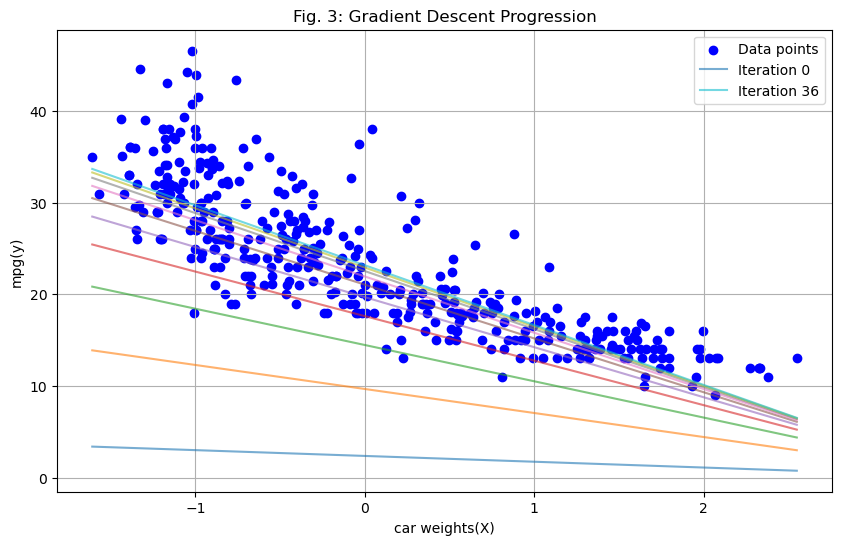

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gradient_descent_progression(X, y, weights_and_bias, num_lines=10):

    # Extract a subset of the weight and bias values for visualization
    step = max(len(weights_and_bias) // num_lines, 1)
    selected_lines = weights_and_bias[::step]
    
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of the data
    plt.scatter(X, y, color='blue', label='Data points')
    
    # Plot regression lines
    x_min, x_max = np.min(X), np.max(X)
    x_vals = np.linspace(x_min, x_max, 100)
    
    for i, (w, b) in enumerate(selected_lines):
        y_vals = w * x_vals + b
        plt.plot(x_vals, y_vals, label=f'Iteration {i * step}' if i == 0 or i == len(selected_lines)-1 else None, alpha=0.6)
    
    plt.title('Fig. 3: Gradient Descent Progression')
    plt.xlabel('car weights(X)')
    plt.ylabel('mpg(y)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_gradient_descent_progression(X, y, weights_and_bias, num_lines=10)


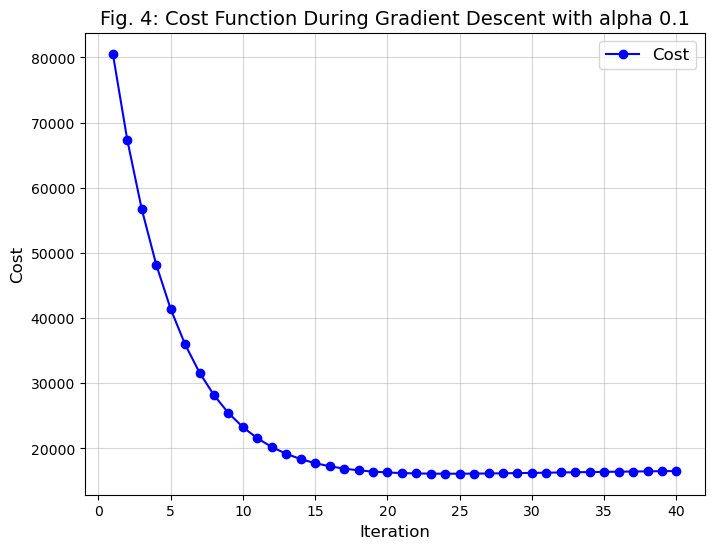

In [63]:
# Plotting the costs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(costs) + 1), costs, marker='o', linestyle='-', color='b', label='Cost')
plt.title(f'Fig. 4: Cost Function During Gradient Descent with alpha {alpha}', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.show()

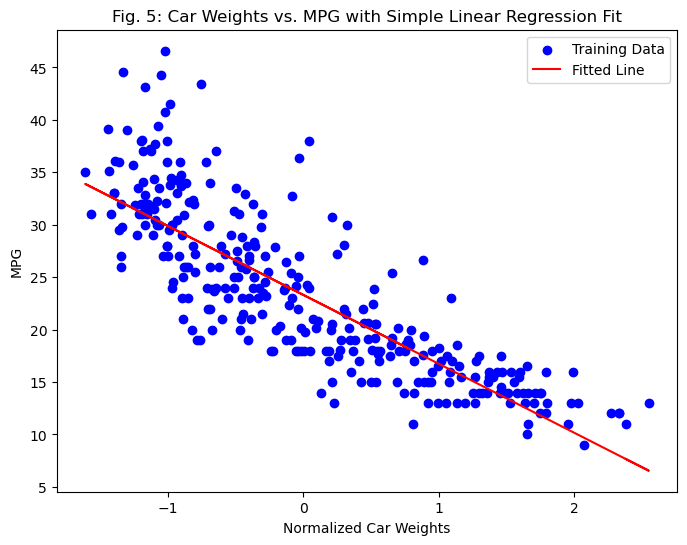

In [64]:
y_pred = w * X_train + b

# 1. Plot Weight vs. MPG with the Fitted Line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, y_pred, color='red', label='Fitted Line')
plt.xlabel('Normalized Car Weights')
plt.ylabel('MPG')
plt.title('Fig. 5: Car Weights vs. MPG with Simple Linear Regression Fit')
plt.legend()
plt.show()

In [65]:
print("weight with GD: ",w)
print("bias with GD: ",b)

weight with GD:  -6.580065131658576
bias with GD:  23.3120603883499


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [67]:
y_train_pred = w * X_train + b

# Metrics for Training data
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Mean Absolute Error (MAE): 3.2772274462238338
Mean Squared Error (MSE): 19.185342651301088
R-squared (R^2): 0.6959521317376112


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_test_pred = w * X_test + b

# Metrics 
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Mean Absolute Error (MAE): 3.3033502673690807
Mean Squared Error (MSE): 16.792565301285844
R-squared (R^2): 0.6709958187121584


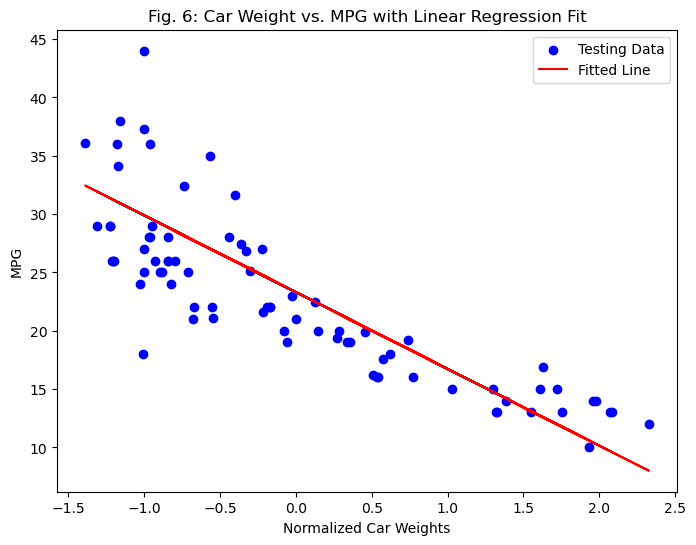

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
plt.plot(X_test, y_test_pred, color='red', label='Fitted Line')
plt.xlabel('Normalized Car Weights')
plt.ylabel('MPG')
plt.title('Fig. 6: Car Weight vs. MPG with Linear Regression Fit')
plt.legend()
plt.show()